In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns

In [ ]:
df = pd.read_csv('seeds_dataset.csv')

In [ ]:
df.head()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
area,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
perimeter,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
compactness,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
lengthOfKernel,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
widthOfKernel,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
asymmetryCoefficient,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
lengthOfKernelGroove,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500
seedType,210.0,2.000000,0.818448,1.0000,1.00000,2.00000,3.000000,3.0000


In [ ]:
df.shape

(210, 8)

In [ ]:
X = df[['area','perimeter','compactness','lengthOfKernel','widthOfKernel','asymmetryCoefficient','lengthOfKernelGroove']]
y = df['seedType']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)


In [ ]:
y_test

34     1
195    3
118    2
18     1
91     2
1      1
123    2
173    3
143    3
82     2
169    3
11     1
177    3
112    2
68     1
88     2
175    3
199    3
193    3
209    3
14     1
139    2
196    3
76     2
90     2
182    3
45     1
127    2
189    3
62     1
198    3
93     2
33     1
48     1
101    2
116    2
6      1
47     1
185    3
77     2
133    2
171    3
Name: seedType, dtype: int64

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(168, 7) (42, 7)
(168,) (42,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10,5), max_iter=700)
mlp.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=700,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
predictions = mlp.predict(X_train)
from sklearn.metrics import classification_report, confusion_matrix
import itertools
cnf_matrix = confusion_matrix(y_train, predictions)
print(classification_report(y_train,predictions))

              precision    recall  f1-score   support

           1       0.93      0.93      0.93        58
           2       0.96      0.96      0.96        55
           3       0.96      0.96      0.96        55

    accuracy                           0.95       168
   macro avg       0.95      0.95      0.95       168
weighted avg       0.95      0.95      0.95       168



In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix Skenario 1',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[54  2  2]
 [ 2 53  0]
 [ 2  0 53]]


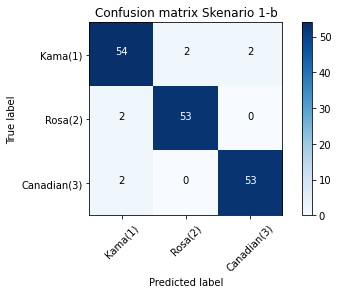

In [ ]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Kama(1)', 'Rosa(2)', 'Canadian(3)'],normalize= False,  title='Confusion matrix Skenario 1-b')

[[12  0  0]
 [ 0 15  0]
 [ 1  0 14]]
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      1.00      1.00        15
           3       1.00      0.93      0.97        15

    accuracy                           0.98        42
   macro avg       0.97      0.98      0.98        42
weighted avg       0.98      0.98      0.98        42

Confusion matrix, without normalization
[[12  0  0]
 [ 0 15  0]
 [ 1  0 14]]


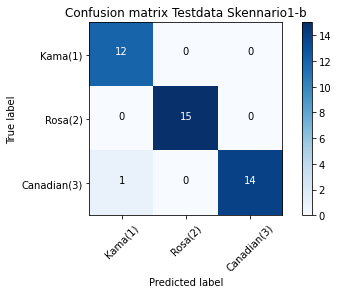

In [ ]:
predictions= mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
cnf_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Kama(1)', 'Rosa(2)', 'Canadian(3)'],normalize= False,  title='Confusion matrix Testdata Skennario1-b')

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

kf = KFold(n_splits=7,shuffle=False)
kf.split(X)
accuracy_model = []
for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Train the model
    model = mlp.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)
    print(accuracy_model)


[63.33333333333333]
[63.33333333333333, 0.0]
[63.33333333333333, 0.0, 86.66666666666667]
[63.33333333333333, 0.0, 86.66666666666667, 100.0]
[63.33333333333333, 0.0, 86.66666666666667, 100.0, 100.0]
[63.33333333333333, 0.0, 86.66666666666667, 100.0, 100.0, 93.33333333333333]
[63.33333333333333, 0.0, 86.66666666666667, 100.0, 100.0, 93.33333333333333, 83.33333333333334]
